# Reading & Plotting Weather Data

In [40]:
from pathlib import Path
import csv
from datetime import datetime

path = Path("weather_data/sitka_weather_2021_simple.csv")
lines = path.read_text(encoding="utf-8").splitlines()

reader = csv.reader(lines)
header_row = next(reader)

dates, highs, lows = zip(*[
    (
        datetime.strptime(row[2], "%Y-%m-%d"),
        int(row[4]),
        int(row[5])
    ) for row in reader
])
print(highs)

(44, 44, 43, 45, 45, 44, 48, 48, 46, 46, 44, 44, 39, 47, 48, 47, 46, 48, 42, 38, 41, 40, 38, 39, 37, 36, 30, 36, 40, 42, 43, 38, 38, 40, 39, 37, 37, 36, 30, 17, 30, 37, 39, 38, 37, 35, 38, 43, 43, 42, 44, 44, 42, 38, 39, 42, 43, 44, 45, 41, 41, 41, 43, 43, 43, 47, 40, 41, 40, 41, 37, 35, 34, 40, 42, 43, 40, 37, 39, 43, 42, 42, 40, 41, 42, 39, 41, 41, 41, 41, 36, 38, 41, 41, 40, 38, 41, 39, 39, 36, 41, 41, 45, 45, 48, 50, 56, 67, 61, 51, 57, 52, 63, 60, 53, 50, 51, 48, 47, 48, 50, 49, 48, 55, 63, 56, 50, 49, 52, 49, 49, 47, 49, 48, 49, 52, 56, 57, 52, 53, 49, 53, 50, 51, 51, 51, 49, 57, 58, 58, 56, 53, 51, 56, 58, 54, 58, 59, 53, 55, 59, 61, 67, 64, 58, 60, 66, 58, 68, 59, 55, 56, 63, 63, 59, 63, 78, 75, 61, 62, 61, 60, 66, 60, 65, 59, 58, 58, 57, 60, 60, 60, 57, 58, 60, 61, 63, 63, 70, 64, 59, 63, 61, 58, 59, 64, 62, 70, 70, 73, 66, 66, 62, 67, 65, 69, 63, 65, 63, 60, 60, 61, 65, 64, 60, 58, 64, 58, 59, 63, 61, 63, 68, 61, 59, 60, 63, 60, 60, 60, 65, 64, 61, 63, 60, 60, 59, 61, 64, 60,

Plot the data in a temperature chart

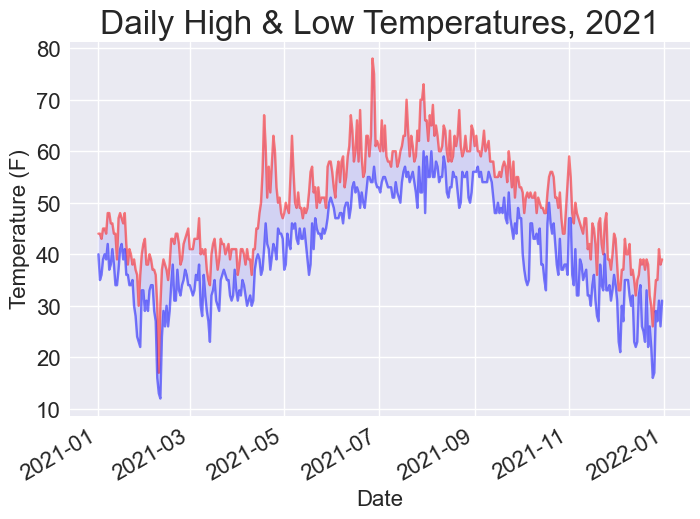

In [41]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()

ax.plot(dates, highs, color="red", alpha=0.5)
ax.plot(dates, lows, color="blue", alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor="blue", alpha=0.1)

ax.set_title("Daily High & Low Temperatures, 2021", fontsize=24)
ax.set_xlabel("Date", fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

## GeoJSON

In [1]:
from pathlib import Path
import json

# Read data as a string and convert to a Python object
path = Path("eq_data/eq_data_1_day_m1.geojson")
contents = path.read_text(encoding="utf-8")
all_eq_data = json.loads(contents)

# Create a more readable version of the data file
path = Path("eq_data/readable_eq_data.geojson")
readable_contents = json.dumps(all_eq_data, indent=4)
_ = path.write_text(readable_contents)

In [43]:
all_eq_dicts = all_eq_data["features"]

In [47]:
[eq_dict["properties"]["mag"] for eq_dict in all_eq_dicts][:10]

[1.6, 1.6, 2.2, 3.7, 2.92000008, 1.4, 4.6, 4.5, 1.9, 1.8]

In [49]:
mags, lons, lats = zip(*[
    (
        eq_dict["properties"]["mag"],
        eq_dict["geometry"]["coordinates"][0],
        eq_dict["geometry"]["coordinates"][1],
    ) for eq_dict in all_eq_dicts
])

## Building a world map

In [52]:
import plotly.express as px

title = "Global Earthquakes"
fix = px.scatter_geo(lat=lats, lon=lons, title=title)
fig.show()

/var/folders/vq/_qpj63bs43n0hn_ytgr4t8br0000gq/T/ipykernel_16549/2324337670.py:5: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

